1本目のスパイラル（真の軌道）: [(0.0, 0.0), (0.09950041652780259, 0.009983341664682815), (0.19601331556824833, 0.03973386615901225), (0.2866009467376818, 0.0886560619984019), (0.3684243976011541, 0.15576733692346023), (0.4387912809451864, 0.2397127693021015), (0.495201368945807, 0.33878548403702136), (0.5353895310991419, 0.45095238106638386), (0.5573653674777324, 0.5738848727196183), (0.559448971443598, 0.7049942186647351), (0.5403023058681398, 0.8414709848078965), (0.4989557335681351, 0.9803280960675791), (0.43482930537200815, 1.1184469031606719), (0.34774847721196356, 1.2526256410423509), (0.23795400006033715, 1.3796296219838444), (0.10610580250155435, 1.4962424799060816), (-0.046719235682062106, 1.5993177648664083), (-0.21903564030239228, 1.6858301777691966), (-0.40896377044755683, 1.7529257355807513), (-0.6142501770406569, 1.7979701666060877), (-0.8322936730942848, 1.8185948536513634), (-1.060176819659701, 1.8127396699626348), (-1.294702457961761, 1.7786920884030983), (-1.5324348489435964, 1.715

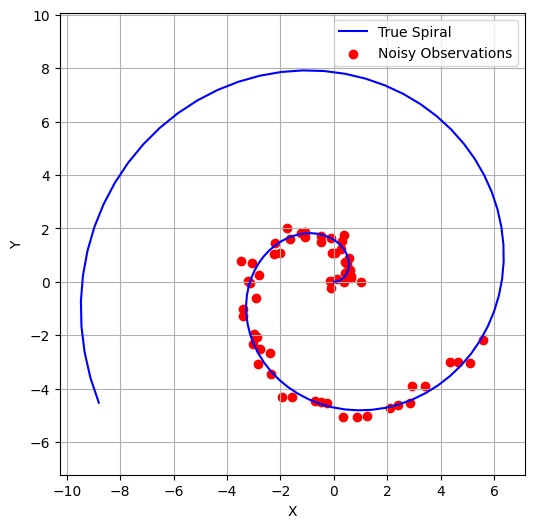

In [2]:


import math #数学関数(sin,cosなど)
import random #乱数


# ## スパイラルの構築
# - スパイラルの式（極座標）： r=a+bΘ
# - rは半径,Θは角度

#ライブラリ無しで「0~6π」をn個に分けたい
def linspace(start,stop,num):
    if num==1:
        return [start]
    step=(stop-start)/(num-1)
    return[start+i*step for i in range(num)]


linspace(0,6,5)

#スパイラルの座標を計算する
def generate_spiral_points (ntotal,a,b):
    points=[] #座標を入れる箱
    for i in range(ntotal):
        theta = i * 0.1  # θを少しずつ大きくする（0.1ラジアン刻み）
        r=a+b*theta
        x=r*math.cos(theta)
        y=r*math.sin(theta)
        points.append((x,y)) # 「~.append」でリストの末尾に要素を追加。ここではpointsリストの末尾に要素を加えていく    
    return(points)



# ノイズを加える関数を作る
# 正規分布ノイズをライブラリ無しで作るにはBox-Muller法を使う
def gaussian_noise(std):
    u1=random.random() # ランダム関数発動。「random.random()」で、0.0以上1.0未満の浮動小数点数の乱数を生成
    u2=random.random()
    z=math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    return z*std


# ランダムな一部をサンプルしてノイズを加える
def sample_with_noise(points,nsample,noise_std):
    if nsample > len(points):
        raise ValueError(f"nsample（{nsample}）はデータ数（{len(points)}）以下にしてください。")
    #start_index=random.randint(0,len(points)-nsample) # random.randint(a,b)で、a<=n<=bの範囲のランダムな整数を返す
    start_index = 0  #ノイズデータの始点を(0,0)からに固定
    sampled=[] # ノイズを加えたデータを入れる箱
    for i in range(start_index,start_index+nsample):
        x,y=points[i] #pointsリストのi番目の要素の座標をx,yにそれぞれ代入
        x +=gaussian_noise(noise_std) #関数gaussian_noise発動
        y +=gaussian_noise(noise_std)
        sampled.append((x,y))
    return sampled


# 全部まとめて関数化する
def generate_spiral_data(nspiral=1,ntotal=100,nsample=60,a=0,b=1,noise_std=0.25): 
    # 「nspiral」はスパイラルの本数,「ntotal」は正解スパイラルのデータ点の数,「nsample」はノイズ付きデータのデータ点の数
    #「a,b」はスパイラル生成で使う変数,「noise_std」はノイズ付きデータを作るときに使うばらつきの強度。値が大きくなるとばらつきも大きい
    
    
    if nsample > ntotal:
        raise ValueError(f"nsample({nsample}) は ntotal({ntotal}) 以下にしてください。")

    all_true=[] # 教師データ
    all_obs=[] # 観測データ（Observation）
    for _ in range(nspiral): # 「for _ in range(ooo)」は「for i in range(ooo)」のように書いてもOKです。 変数名が「_」になっているだけです。
        is_ccw = random.random()>0.5  #50％の確率で時計回りor反時計回り。is_ccw（is counter-clockwise）は、ランダムに True（反時計）か False（時計）を選びます。
        sign = 1 if is_ccw else -1 # 条件式が真のときに評価される式 if 条件式 else 条件式が偽のときに評価される式。
        spiral=generate_spiral_points(ntotal,a,b*sign) #関数generate_spiral_points発動
        obs=sample_with_noise(spiral,nsample,noise_std) #関数sample_with_noise発動
        all_true.append(spiral)
        all_obs.append(obs)
    return all_true,all_obs


true_paths, noisy_samples = generate_spiral_data()
print("1本目のスパイラル（真の軌道）:", true_paths[0])
print("1本目の観測データ（ノイズあり）:", noisy_samples[0])


import matplotlib.pyplot as plt


# 描画する前にデータを整理
def data_cleaning(true_paths,noisy_samples):
    for i in range(len(true_paths)):
        true=true_paths[i]
        noisy=noisy_samples[i]

        true_x=[p[0] for p in true] #リスト内包表記。trueの中のすべての点pから、x座標（p[0]）だけを取り出してリストにする
        true_y=[p[1] for p in true] #「for p in true」はtrueというリストの中から要素をpに取り出す

        noisy_x=[p[0] for p in noisy]
        noisy_y=[p[1] for p in noisy]
    return true_x,true_y,noisy_x,noisy_y
        
true_x,true_y,noisy_x,noisy_y=data_cleaning(true_paths, noisy_samples) #data_cleaning関数発動して各変数に代入
plt.figure(figsize=(6,6)) #「plt.figure」で新しい図（キャンバス）を作る。figsize=(o,o)でサイズ指定(単位はインチ)
plt.plot(true_x,true_y,label='True Spiral',color='blue')
plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数

plt.xlabel('X')
plt.ylabel('Y')
plt.legend() #上で指定した、label="○○"で付けた名前を表示してくれる
plt.axis('equal') #スケールを同じにする
plt.grid(True) #グリッド線を引くか
plt.show() #これを言わんと出力されん













Step 0, Loss 5.4414


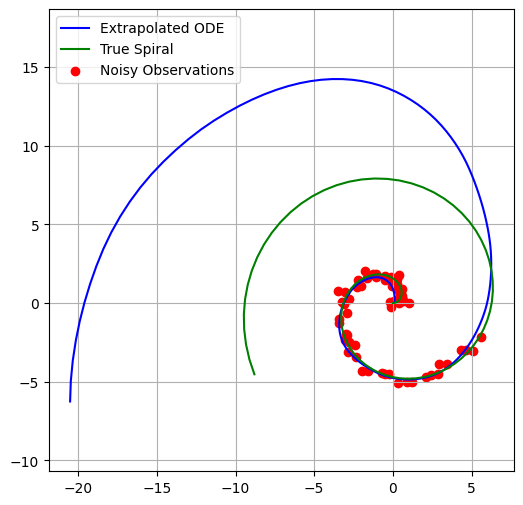

Step 0, Loss 7.0118


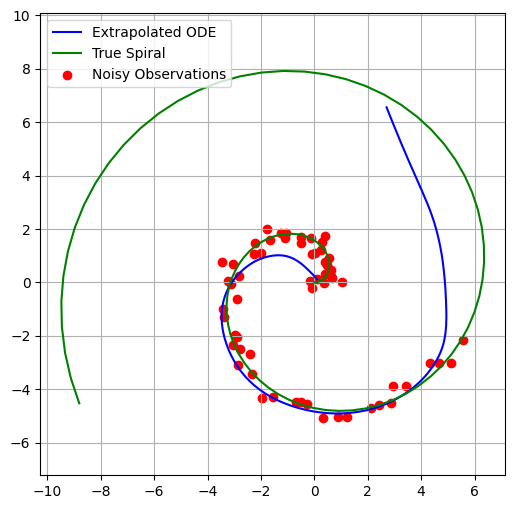

Step 0, Loss 6.0946


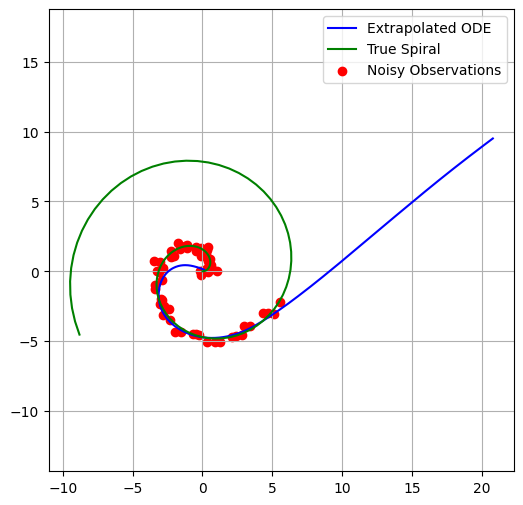

Step 0, Loss 8.2036


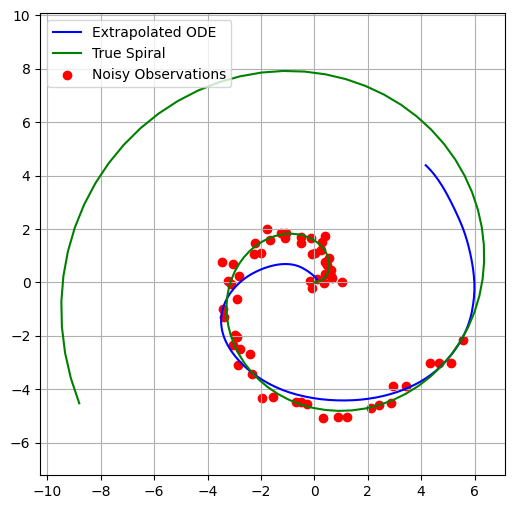

Step 0, Loss 5.4880


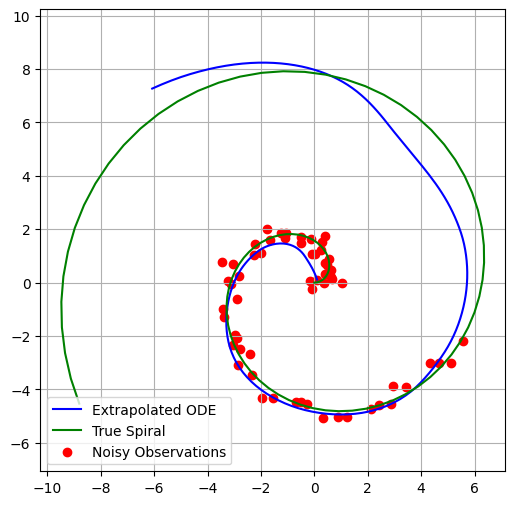

Step 0, Loss 6.1125


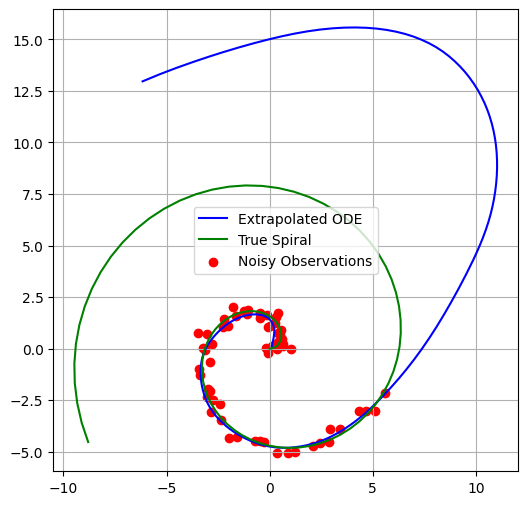

Step 0, Loss 4.5506


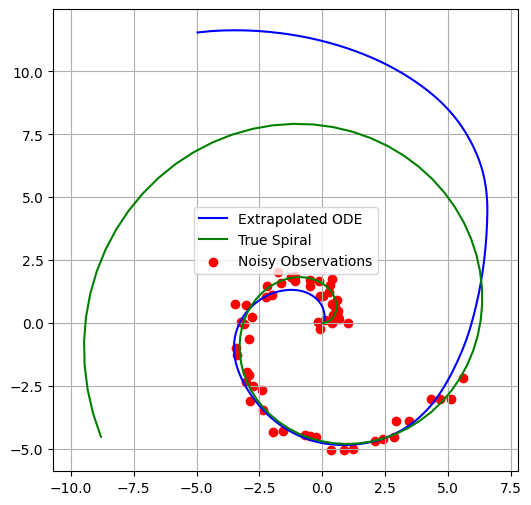

Step 0, Loss 13.1424


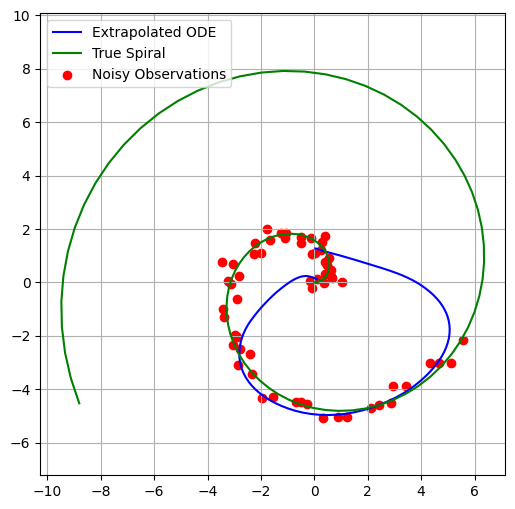

Step 0, Loss 11.7001


KeyboardInterrupt: 

In [17]:
import torch
import pandas as pd


all_result=[]# すべての外挿結果を格納するリスト
n=30 #外挿を何セットやりたいか
for j in range(n):
    # 観測データの整形
    # 時間の配列。stepsは観測点数。つまりノイズデータの数

    #回帰実験用↓
    # t=torch.linspace(0,6,steps=60) #torch.linspace(開始,終了,oo分割)でtensorの配列を作る

    # 外挿用↓
    # t_train = torch.linspace(0, 6, steps=120)←この行は無視
    t_train =torch.linspace(0,6,steps=60)  # 60ステップに修正

    #回帰用
    #データ整形（バッチ×時刻×次元数）
    # x=torch.tensor(noisy_samples[0],dtype=torch.float32) # 1つ目のスパイラル観測点
    # x=x.unsqueeze(0) #

    # 外挿用
    x_train = torch.tensor(noisy_samples[0], dtype=torch.float32).unsqueeze(0)




    import torch.nn as nn

    # dy/dt = f(y, t) の f をNNで定義
    class ODEFunc(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(2, 50),
                nn.ReLU(),
                # nn.Tanh(),
                nn.Linear(50, 2),
            )

        def forward(self, t, y):
            return self.net(y)



    from torchdiffeq import odeint

    # ODEFuncをインスタンス化
    func = ODEFunc()


    # 初期状態(回帰用)（時刻t=0での位置）を決める
    # y0 = x[:, 0, :]  # shape: (1, 2)

    # 初期状態(外挿用)（時刻t=0での位置）を決める
    y0 = x_train[:, 0] # [:,x]スライス構文。「:」はすべての要素を取るの意味。xは何列目かを表す。つまりこの場合、x_trainのリストの内、0列目をすべて取るの意味
    # 最初の時刻の観測点（形状は [1, 2]）


    # ODEを解いて系列を得る（tに沿って解く）回帰用↓
    # pred_y = odeint(func, y0, t)  # shape: (30, 1, 2)
    # pred_y = pred_y.permute(1, 0, 2)  # shape: (1, 30, 2)




    optimizer = torch.optim.Adam(func.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()

    """
    #回帰用
    for itr in range(1000):
        optimizer.zero_grad()
        pred_y = odeint(func, y0, t).permute(1, 0, 2)
        loss = loss_fn(pred_y, x)
        loss.backward()
        optimizer.step()


        if itr % 100 == 0:
            print(f"Step {itr}, Loss {loss.item():.4f}")
        
    pred_x = pred_y[0].detach().numpy()    
    """

    # 外挿用
    for itr in range(100):
        optimizer.zero_grad()
        pred_y = odeint(func, y0, t_train) #[60, 1, 2]
        pred_y = pred_y.permute(1, 0, 2) #[1, 60, 2]
        loss = loss_fn(pred_y, x_train)
        loss.backward()
        optimizer.step()
        
        if itr % 100 == 0:
            print(f"Step {itr}, Loss {loss.item():.4f}")
    t_extrapolate = torch.linspace(0, 10, steps=200)  # 外挿の時間範囲
    pred_y_extrapolated = odeint(func, y0, t_extrapolate).squeeze(1).detach().numpy() # 外挿予測した結果を格納

    # print(j+1,"回目外挿予測結果データ:",pred_y_extrapolated)
    df = pd.DataFrame(pred_y_extrapolated,columns=["x","y"])
    df["試行回数"]=j+1# 何回目の繰り返しかを記録
    all_result.append(df)



    plt.figure(figsize=(6, 6))

    #回帰用↓
    # plt.plot(pred_x[:, 0], pred_x[:, 1], label="Fitted ODE", color='blue')

    # 外挿用↓
    plt.plot(pred_y_extrapolated[:, 0], pred_y_extrapolated[:, 1], label="Extrapolated ODE", color='blue')

    plt.plot(true_x,true_y,label='True Spiral',color='green')
    plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()



# n回の外挿のデータセットを1つのDataFrameにまとめる（外挿の平均実験用に追加）
all_result_df = pd.concat(all_result, ignore_index=True)# 新しいindexを0から順に振り直す（重複なし）

# CSVファイルに保存（外挿の平均実験用に追加）
all_result_df.to_csv("pred_y_extrapolated_all.csv", index=False, encoding="utf-8")# 「index=False にするのは、余分なインデックス列を省くため」

# 各回の平均を取って一つの結果を出す
import numpy as np

df = pd.read_csv("pred_y_extrapolated_all.csv")# csv読み込み
x_array=df["x"].values # pred_y_extrapolated_all.csvのうちxの要素をnumpy配列として格納。これで配列と同じような計算ができる  
y_array=df["y"].values

all_ave=[]# すべての平均結果を入れるリスト
for j in range(0,200,1):
    x_sum=0
    y_sum=0
    for k in range (j,j+((n-1)*200)+1,200):
        x_sum+=x_array[k]
        y_sum+=y_array[k]

    x_ave=x_sum/n
    y_ave=y_sum/n
    all_ave.append([x_ave,y_ave])
print(all_ave)# all_aveの中身は[[np.float64(-0.0010858196), np.float64(0.271589)]]のようになるが、普通の配列と同じように要素を取り出したり、計算したりできるので問題ない

all_ave = np.array(all_ave)  # ← リストをNumPy配列に変換。これをすることで下のプロットのスライスを用いた書き方ができる。逆にこれがないと「リストのまま NumPy 的なインデックス指定」することになりエラーになる
plt.figure(figsize=(6, 6))
plt.plot(all_ave[:, 0], all_ave[:, 1], label="Average result (30 extrapolated predictions)", color='blue')# 各回の平均を取ったスパイラル予測
plt.plot(true_x,true_y,label='True Spiral',color='green')
plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


[[np.float64(-0.0069089790000000035), np.float64(0.19553249999999994)], [np.float64(0.0334054684), np.float64(0.20324898200000002)], [np.float64(0.0754234846), np.float64(0.21177044233333334)], [np.float64(0.11917541083333333), np.float64(0.22129208400000003)], [np.float64(0.16455670166666667), np.float64(0.2322097766666666)], [np.float64(0.21120499666666664), np.float64(0.24507212066666667)], [np.float64(0.25865222666666665), np.float64(0.2602358223333333)], [np.float64(0.3063807916666667), np.float64(0.27811838299999997)], [np.float64(0.35367667133333336), np.float64(0.299116097)], [np.float64(0.39973338933333336), np.float64(0.32364390033333323)], [np.float64(0.444062451), np.float64(0.35201202)], [np.float64(0.4860492839999999), np.float64(0.38437632566666674)], [np.float64(0.5251823066666668), np.float64(0.4208401493333332)], [np.float64(0.5608714803333332), np.float64(0.46148905200000007)], [np.float64(0.592550767), np.float64(0.5062770423333334)], [np.float64(0.6196017623333334)

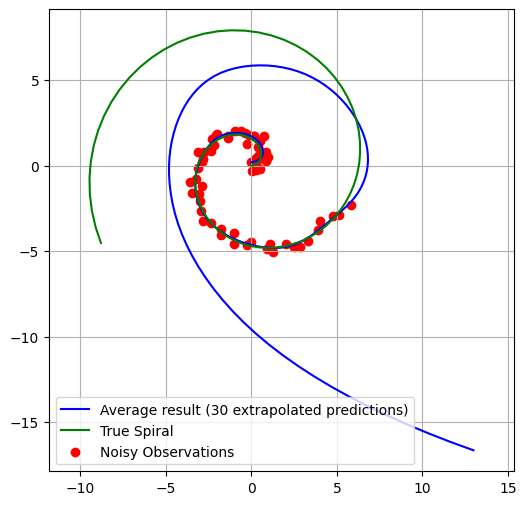

In [ ]:


# 画像保存コード↓
import os

# 保存先のフォルダを指定
save_dir = "output_images"
# ファイル名を自動生成（例：連番や日時）
from datetime import datetime
filename = datetime.now().strftime("plot_%Y%m%d_%H%M%S.png")

# 保存
save_path = os.path.join(save_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"画像を保存しました: {save_path}")



In [ ]:
print (all_ave[0][0])

-0.0069089790000000035


1 回目
Step 0, Loss 9.8452
Step 100, Loss 1.0528
Step 200, Loss 0.0965
Step 300, Loss 0.0840
Step 400, Loss 0.0785
Step 500, Loss 0.0738
Step 600, Loss 0.0706
Step 700, Loss 0.0929
Step 800, Loss 0.0661
Step 900, Loss 0.0647
Step 999, Loss 0.0642
2 回目
Step 0, Loss 6.7529
Step 100, Loss 0.1012
Step 200, Loss 0.0822
Step 300, Loss 0.0762
Step 400, Loss 0.0746
Step 500, Loss 0.0702
Step 600, Loss 0.0668
Step 700, Loss 0.0685
Step 800, Loss 0.0645
Step 900, Loss 0.0683
Step 999, Loss 0.0660
3 回目
Step 0, Loss 9.1246
Step 100, Loss 0.6589
Step 200, Loss 0.1053
Step 300, Loss 0.0899
Step 400, Loss 0.0842
Step 500, Loss 0.0805
Step 600, Loss 0.1282
Step 700, Loss 0.0850
Step 800, Loss 0.0761
Step 900, Loss 0.0871
Step 999, Loss 0.0691
4 回目
Step 0, Loss 5.2583
Step 100, Loss 0.0858
Step 200, Loss 0.0898
Step 300, Loss 0.0712
Step 400, Loss 0.0689
Step 500, Loss 0.0739
Step 600, Loss 0.0714
Step 700, Loss 0.0660
Step 800, Loss 0.0639
Step 900, Loss 0.0685
Step 999, Loss 0.0706
5 回目
Step 0, Loss 7.

C:\Users\maedlab24a\AppData\Local\Temp\ipykernel_23524\3376692827.py:115: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


Step 100, Loss 0.0916
Step 200, Loss 0.0822
Step 300, Loss 0.0783
Step 400, Loss 0.0710
Step 500, Loss 0.0679
Step 600, Loss 0.0678
Step 700, Loss 0.0636
Step 800, Loss 0.0624
Step 900, Loss 0.0639
Step 999, Loss 0.0627
23 回目
Step 0, Loss 9.3313
Step 100, Loss 3.6968
Step 200, Loss 1.2885
Step 300, Loss 0.4298
Step 400, Loss 0.0889
Step 500, Loss 0.0790
Step 600, Loss 0.0759
Step 700, Loss 0.0733
Step 800, Loss 0.0843
Step 900, Loss 0.0695
Step 999, Loss 0.0736
24 回目
Step 0, Loss 5.1424
Step 100, Loss 0.1809
Step 200, Loss 0.1087
Step 300, Loss 0.0909
Step 400, Loss 0.0785
Step 500, Loss 0.0733
Step 600, Loss 0.0703
Step 700, Loss 0.0673
Step 800, Loss 0.0655
Step 900, Loss 0.0643
Step 999, Loss 0.0649
25 回目
Step 0, Loss 10.7718
Step 100, Loss 2.2038
Step 200, Loss 0.2550
Step 300, Loss 0.0980
Step 400, Loss 0.0907
Step 500, Loss 0.0842
Step 600, Loss 0.0790
Step 700, Loss 0.0748
Step 800, Loss 0.0717
Step 900, Loss 0.0972
Step 999, Loss 0.0676
26 回目
Step 0, Loss 6.9826
Step 100, Loss 

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

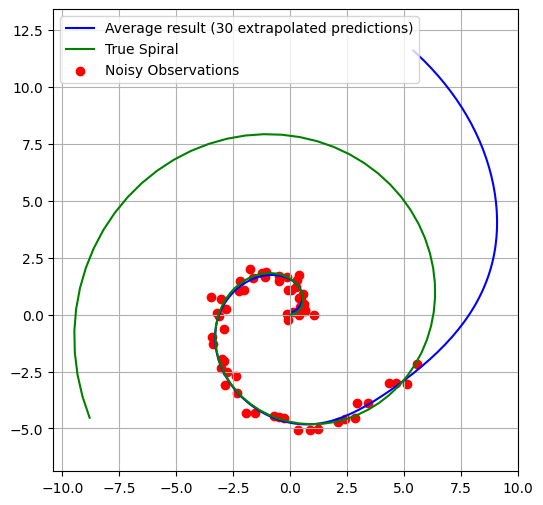

画像を保存しました: output_images\plot_20251021_232351.png
1 回目
Step 0, Loss 6.2724
Step 100, Loss 0.7475
Step 200, Loss 0.0832
Step 300, Loss 0.1637
Step 400, Loss 0.0747
Step 500, Loss 0.0717
Step 600, Loss 0.0769
Step 700, Loss 0.0703
Step 800, Loss 0.0660
Step 900, Loss 0.0942
Step 999, Loss 0.0642
2 回目
Step 0, Loss 5.7726
Step 100, Loss 0.1336
Step 200, Loss 0.0856
Step 300, Loss 0.0808
Step 400, Loss 0.0748
Step 500, Loss 0.0715
Step 600, Loss 0.0690
Step 700, Loss 0.0663
Step 800, Loss 0.0649
Step 900, Loss 0.0650
Step 999, Loss 0.0718
3 回目
Step 0, Loss 4.9965
Step 100, Loss 0.1107
Step 200, Loss 0.0791
Step 300, Loss 0.0738
Step 400, Loss 0.0771
Step 500, Loss 0.0680
Step 600, Loss 0.0689
Step 700, Loss 0.0703
Step 800, Loss 0.0629
Step 900, Loss 0.0625
Step 999, Loss 0.0616
4 回目
Step 0, Loss 5.3098
Step 100, Loss 0.1369
Step 200, Loss 0.1023
Step 300, Loss 0.0781
Step 400, Loss 0.0738
Step 500, Loss 0.0716
Step 600, Loss 0.0735
Step 700, Loss 0.0698
Step 800, Loss 0.0693
Step 900, Loss

C:\Users\maedlab24a\AppData\Local\Temp\ipykernel_23524\3376692827.py:115: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


Step 100, Loss 0.5210
Step 200, Loss 0.0806
Step 300, Loss 0.0764
Step 400, Loss 0.0730
Step 500, Loss 0.0723
Step 600, Loss 0.0778
Step 700, Loss 0.0685
Step 800, Loss 0.0657
Step 900, Loss 0.0790
Step 999, Loss 0.0639
23 回目
Step 0, Loss 5.5495
Step 100, Loss 0.2432
Step 200, Loss 0.0826
Step 300, Loss 0.0776
Step 400, Loss 0.0740
Step 500, Loss 0.0742
Step 600, Loss 0.0722
Step 700, Loss 0.0714
Step 800, Loss 0.0657
Step 900, Loss 0.0694
Step 999, Loss 0.0647
24 回目
Step 0, Loss 6.1443
Step 100, Loss 0.3416
Step 200, Loss 0.0811
Step 300, Loss 0.0752
Step 400, Loss 0.0712
Step 500, Loss 0.0733
Step 600, Loss 0.0755
Step 700, Loss 0.0645
Step 800, Loss 0.0652
Step 900, Loss 0.0646
Step 999, Loss 0.0619
25 回目
Step 0, Loss 5.0114
Step 100, Loss 0.0969
Step 200, Loss 0.1015
Step 300, Loss 0.0826
Step 400, Loss 0.0887
Step 500, Loss 0.0709
Step 600, Loss 0.0688
Step 700, Loss 0.0674
Step 800, Loss 0.0662
Step 900, Loss 0.0661
Step 999, Loss 0.0674
26 回目
Step 0, Loss 4.9686
Step 100, Loss 0

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

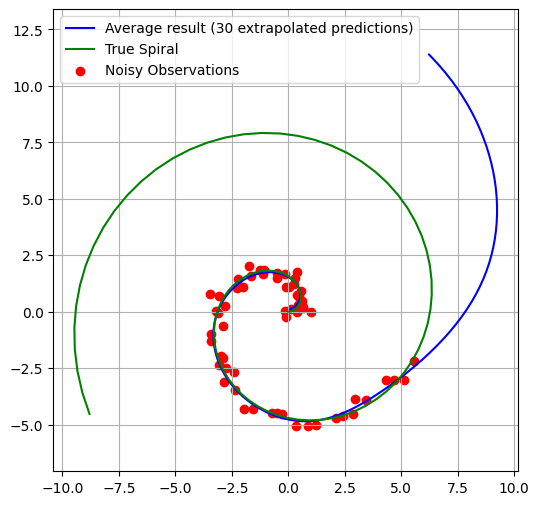

画像を保存しました: output_images\plot_20251021_235605.png
1 回目
Step 0, Loss 6.4609
Step 100, Loss 0.3694
Step 200, Loss 0.0773
Step 300, Loss 0.0730
Step 400, Loss 0.0704
Step 500, Loss 0.0685
Step 600, Loss 0.0665
Step 700, Loss 0.0690
Step 800, Loss 0.0659
Step 900, Loss 0.0633
Step 999, Loss 0.0716
2 回目
Step 0, Loss 4.5577
Step 100, Loss 0.1413
Step 200, Loss 0.0871
Step 300, Loss 0.1605
Step 400, Loss 0.0736
Step 500, Loss 0.0702
Step 600, Loss 0.0693
Step 700, Loss 0.0661
Step 800, Loss 0.0664
Step 900, Loss 0.0647
Step 999, Loss 0.0624
3 回目
Step 0, Loss 5.6687
Step 100, Loss 0.0945
Step 200, Loss 0.0845
Step 300, Loss 0.0778
Step 400, Loss 0.1198
Step 500, Loss 0.1020
Step 600, Loss 0.0677
Step 700, Loss 0.0656
Step 800, Loss 0.0642
Step 900, Loss 0.0630
Step 999, Loss 0.0760
4 回目
Step 0, Loss 5.1271
Step 100, Loss 0.0787
Step 200, Loss 0.0969
Step 300, Loss 0.0703
Step 400, Loss 0.0673
Step 500, Loss 0.0750
Step 600, Loss 0.0644
Step 700, Loss 0.0671
Step 800, Loss 0.0630
Step 900, Loss

C:\Users\maedlab24a\AppData\Local\Temp\ipykernel_23524\3376692827.py:115: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


Step 100, Loss 1.1297
Step 200, Loss 0.1118
Step 300, Loss 0.0888
Step 400, Loss 0.0839
Step 500, Loss 0.0798
Step 600, Loss 0.0766
Step 700, Loss 0.0808
Step 800, Loss 0.0711
Step 900, Loss 0.0691
Step 999, Loss 0.0702
23 回目
Step 0, Loss 3.7307
Step 100, Loss 0.0938
Step 200, Loss 0.0788
Step 300, Loss 0.0772
Step 400, Loss 0.0705
Step 500, Loss 0.0734
Step 600, Loss 0.0664
Step 700, Loss 0.0677
Step 800, Loss 0.0640
Step 900, Loss 0.0634
Step 999, Loss 0.0653
24 回目
Step 0, Loss 6.1764
Step 100, Loss 0.0919
Step 200, Loss 0.0781
Step 300, Loss 0.0714
Step 400, Loss 0.0741
Step 500, Loss 0.0671
Step 600, Loss 0.0636
Step 700, Loss 0.0624
Step 800, Loss 0.0630
Step 900, Loss 0.0606
Step 999, Loss 0.0602
25 回目
Step 0, Loss 7.5196
Step 100, Loss 0.7229
Step 200, Loss 0.0942
Step 300, Loss 0.0818
Step 400, Loss 0.0753
Step 500, Loss 0.0713
Step 600, Loss 0.0684
Step 700, Loss 0.0663
Step 800, Loss 0.0654
Step 900, Loss 0.0758
Step 999, Loss 0.0623
26 回目
Step 0, Loss 5.3926
Step 100, Loss 0

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

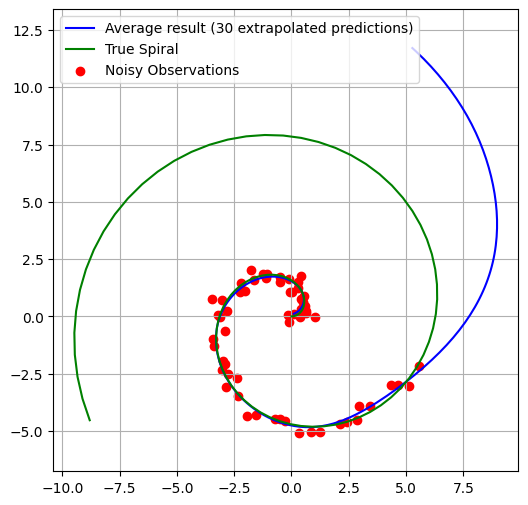

画像を保存しました: output_images\plot_20251022_002833.png


In [22]:
import torch
import pandas as pd



for g in range (3):
    all_result=[]# すべての外挿結果を格納するリスト
    n=30 #外挿を何セットやりたいか
    
    for j in range(n):
        # 観測データの整形
        # 時間の配列。stepsは観測点数。つまりノイズデータの数

        #回帰実験用↓
        # t=torch.linspace(0,6,steps=60) #torch.linspace(開始,終了,oo分割)でtensorの配列を作る

        # 外挿用↓
        # t_train = torch.linspace(0, 6, steps=120)←この行は無視
        t_train =torch.linspace(0,6,steps=60)  # 60ステップに修正

        #回帰用
        #データ整形（バッチ×時刻×次元数）
        # x=torch.tensor(noisy_samples[0],dtype=torch.float32) # 1つ目のスパイラル観測点
        # x=x.unsqueeze(0) #

        # 外挿用
        noisy_samples[0]=[(0.10239902391996954, 0.11580056390670457), (-0.10421748945527998, -0.23012078312513365), (0.3690317841091052, -0.023776366229311778), (-0.15753532543433213, 0.04457223952374943), (0.41706253193865317, 0.31643474673155825), (0.6528136366108184, 0.14526359939605504), (0.6092546724124366, 0.45852069226048625), (1.0298695896183352, -0.0059576342958349016), (0.6421624161405008, 0.2208680689277307), (0.4913206597708816, 0.6481947059450557), (0.5660380258641087, 0.8969843688257058), (0.4010902458498077, 0.7444559248599489), (0.29200915082171763, 1.5113688470993856), (0.2637545467733036, 1.221333746541028), (-0.08436385147649764, 1.0717980758618026), (0.3955593253207511, 1.7496449145343083), (-0.4839088328506933, 1.4803150011626132), (-0.1231706507381572, 1.646892028175116), (0.03080495335281458, 1.081718692667352), (-0.4864351152664447, 1.7057899402509487), (-1.2393811952156515, 1.8427942566303692), (-1.0982560080634793, 1.657822011065565), (-1.0737067791143184, 1.8560300739642674), (-1.6419172322572297, 1.5941724466856129), (-1.7555371759582798, 2.0075659424773655), (-2.2182946816701734, 1.4614177173142109), (-2.0136721375002407, 1.0954261593122883), (-2.2537704380530483, 1.0453140094246924), (-2.8045948474970106, 0.2441923365404034), (-3.463324761556913, 0.7664331890629191), (-3.050115036149694, 0.7015969066337092), (-3.1236786195320594, -0.0446400187854267), (-3.2190838506478068, 0.04647056353471324), (-2.906138028684448, -0.6244661481896059), (-3.418121489935185, -1.0055945549057799), (-3.3998216312278404, -1.2926374254545892), (-2.975174323538844, -1.9610437007189097), (-3.045980398594141, -2.3453996546866476), (-2.7715914655932643, -2.5011746339143266), (-2.896362777717738, -2.0568665842478224), (-2.8599684344725844, -3.09575028950772), (-2.3975147029892283, -2.6842604426219805), (-2.3476288835249695, -3.451197848606106), (-1.9556071914590525, -4.328859274215626), (-1.5623509817214931, -4.308635030600651), (-0.7047340542598113, -4.4706818301061375), (-0.4818959309010548, -4.484960224868322), (-0.269028069786104, -4.543414977779557), (0.33898945438740585, -5.065398186084051), (0.8687157562119179, -5.045208995976455), (1.2356009368758212, -5.028560456350528), (2.103028353975547, -4.715479945501848), (2.417788963985474, -4.599981460602762), (2.853579956062732, -4.531204185431912), (2.9363875035484424, -3.887344276522127), (3.4283134544669176, -3.8949215272633206), (4.336330296379213, -3.0100006776417274), (4.664214627129067, -3.0141021537827473), (5.106567801338863, -3.026343102884095), (5.58287496214978, -2.173377512666456)]
        x_train = torch.tensor(noisy_samples[0], dtype=torch.float32).unsqueeze(0)




        import torch.nn as nn

        # dy/dt = f(y, t) の f をNNで定義
        class ODEFunc(nn.Module):
            def __init__(self):
                super().__init__()
                self.net = nn.Sequential(
                    nn.Linear(2, 50),
                    # nn.ReLU(),
                    nn.Tanh(),
                    nn.Linear(50, 2),
                )

            def forward(self, t, y):
                return self.net(y)



        from torchdiffeq import odeint

        # ODEFuncをインスタンス化
        func = ODEFunc()


        # 初期状態(回帰用)（時刻t=0での位置）を決める
        # y0 = x[:, 0, :]  # shape: (1, 2)

        # 初期状態(外挿用)（時刻t=0での位置）を決める
        y0 = x_train[:, 0] # [:,x]スライス構文。「:」はすべての要素を取るの意味。xは何列目かを表す。つまりこの場合、x_trainのリストの内、0列目をすべて取るの意味
        # 最初の時刻の観測点（形状は [1, 2]）


        # ODEを解いて系列を得る（tに沿って解く）回帰用↓
        # pred_y = odeint(func, y0, t)  # shape: (30, 1, 2)
        # pred_y = pred_y.permute(1, 0, 2)  # shape: (1, 30, 2)




        optimizer = torch.optim.Adam(func.parameters(), lr=0.01)
        loss_fn = nn.MSELoss()

        """
        #回帰用
        for itr in range(1000):
            optimizer.zero_grad()
            pred_y = odeint(func, y0, t).permute(1, 0, 2)
            loss = loss_fn(pred_y, x)
            loss.backward()
            optimizer.step()


            if itr % 100 == 0:
                print(f"Step {itr}, Loss {loss.item():.4f}")
            
        pred_x = pred_y[0].detach().numpy()    
        """

        print(j+1,"回目")
        # 外挿用
        for itr in range(1000):
            optimizer.zero_grad()
            pred_y = odeint(func, y0, t_train) #[60, 1, 2]
            pred_y = pred_y.permute(1, 0, 2) #[1, 60, 2]
            loss = loss_fn(pred_y, x_train)
            loss.backward()
            optimizer.step()

            
            if itr % 100 == 0 or itr==999:
                
                print(f"Step {itr}, Loss {loss.item():.4f}")
        t_extrapolate = torch.linspace(0, 10, steps=200)  # 外挿の時間範囲
        pred_y_extrapolated = odeint(func, y0, t_extrapolate).squeeze(1).detach().numpy() # 外挿予測した結果を格納

        # print(j+1,"回目外挿予測結果データ:",pred_y_extrapolated)
        df = pd.DataFrame(pred_y_extrapolated,columns=["x","y"])
        df["試行回数"]=j+1# 何回目の繰り返しかを記録
        all_result.append(df)



        plt.figure(figsize=(6, 6))

        #回帰用↓
        # plt.plot(pred_x[:, 0], pred_x[:, 1], label="Fitted ODE", color='blue')

        # 外挿用↓
        # plt.plot(pred_y_extrapolated[:, 0], pred_y_extrapolated[:, 1], label="Extrapolated ODE", color='blue')

        # plt.plot(true_x,true_y,label='True Spiral',color='green')
        # plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
        # plt.legend()
        # plt.grid(True)
        # plt.axis('equal')
        # plt.show()



    # n回の外挿のデータセットを1つのDataFrameにまとめる（外挿の平均実験用に追加）
    all_result_df = pd.concat(all_result, ignore_index=True)# 新しいindexを0から順に振り直す（重複なし）

    # CSVファイルに保存（外挿の平均実験用に追加）
    all_result_df.to_csv("pred_y_extrapolated_all.csv", index=False, encoding="utf-8")# 「index=False にするのは、余分なインデックス列を省くため」

    # 各回の平均を取って一つの結果を出す
    import numpy as np

    df = pd.read_csv("pred_y_extrapolated_all.csv")# csv読み込み
    x_array=df["x"].values # pred_y_extrapolated_all.csvのうちxの要素をnumpy配列として格納。これで配列と同じような計算ができる  
    y_array=df["y"].values

    all_ave=[]# すべての平均結果を入れるリスト
    for j in range(0,200,1):
        x_sum=0
        y_sum=0
        for k in range (j,j+((n-1)*200)+1,200):
            x_sum+=x_array[k]
            y_sum+=y_array[k]

        x_ave=x_sum/n
        y_ave=y_sum/n
        all_ave.append([x_ave,y_ave])
    print(all_ave)# all_aveの中身は[[np.float64(-0.0010858196), np.float64(0.271589)]]のようになるが、普通の配列と同じように要素を取り出したり、計算したりできるので問題ない



    all_ave = np.array(all_ave)  # ← リストをNumPy配列に変換。これをすることで下のプロットのスライスを用いた書き方ができる。逆にこれがないと「リストのまま NumPy 的なインデックス指定」することになりエラーになる
    plt.figure(figsize=(6, 6))
    plt.plot(all_ave[:, 0], all_ave[:, 1], label="Average result (30 extrapolated predictions)", color='blue')# 各回の平均を取ったスパイラル予測
    plt.plot(true_x,true_y,label='True Spiral',color='green')
    plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    # 画像保存コード↓
    import os

    # 保存先のフォルダを指定
    save_dir = "output_images"
    # ファイル名を自動生成（例：連番や日時）
    from datetime import datetime
    filename = datetime.now().strftime("plot_%Y%m%d_%H%M%S.png")

    # 保存
    save_path = os.path.join(save_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"画像を保存しました: {save_path}")
    plt.show()
    # メモリ解放
    plt.close()
        

    





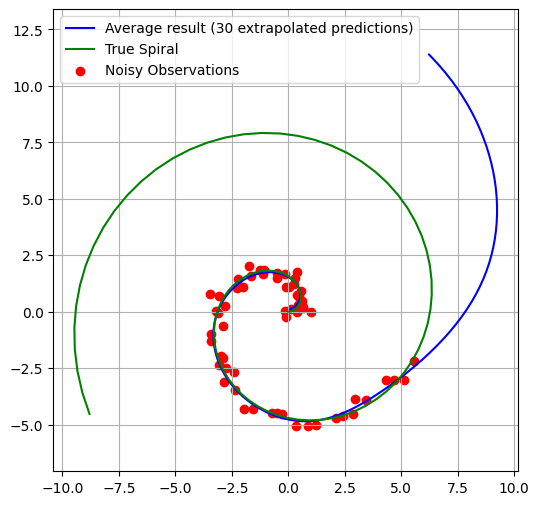

In [23]:
res=[[np.float64(0.10239902), np.float64(0.11580057000000009)], [np.float64(0.138541914), np.float64(0.13067185950000004)], [np.float64(0.17465484399999998), np.float64(0.14814353333333327)], [np.float64(0.21050713533333335), np.float64(0.1682570916666667)], [np.float64(0.24585747800000002), np.float64(0.19103880666666667)], [np.float64(0.28045518766666666), np.float64(0.21649978033333334)], [np.float64(0.3140417463333333), np.float64(0.24463548366666663)], [np.float64(0.3463519983333333), np.float64(0.27542583800000003)], [np.float64(0.3771158320000001), np.float64(0.3088354536666666)], [np.float64(0.4060595626666666), np.float64(0.34481359466666667)], [np.float64(0.43290731099999996), np.float64(0.3832945999999999)], [np.float64(0.45738261133333336), np.float64(0.4241979106666666)], [np.float64(0.4792096536666666), np.float64(0.467428062)], [np.float64(0.49811526333333334), np.float64(0.5128756376666668)], [np.float64(0.513829284), np.float64(0.5604161416666665)], [np.float64(0.5260875283333333), np.float64(0.6099104490000001)], [np.float64(0.5346322596666667), np.float64(0.6612049699999998)], [np.float64(0.5392141893333331), np.float64(0.714130081)], [np.float64(0.5395941446666668), np.float64(0.7685005539999998)], [np.float64(0.5355448636666666), np.float64(0.8241147506666666)], [np.float64(0.5268524576666667), np.float64(0.8807537253333333)], [np.float64(0.5133195563333333), np.float64(0.9381809116666665)], [np.float64(0.49476575300000014), np.float64(0.9961421196666667)], [np.float64(0.4710302989999999), np.float64(1.0543639333333332)], [np.float64(0.44197469666666667), np.float64(1.112555023333333)], [np.float64(0.4074838773333333), np.float64(1.1704054099999999)], [np.float64(0.3674688006666667), np.float64(1.2275880633333334)], [np.float64(0.32186764966666664), np.float64(1.2837591266666666)], [np.float64(0.27064871033333326), np.float64(1.33855943)], [np.float64(0.21381054633333332), np.float64(1.391616203333333)], [np.float64(0.1513841738), np.float64(1.4425455866666668)], [np.float64(0.08343389409999999), np.float64(1.49095388)], [np.float64(0.010058295947666666), np.float64(1.5364396699999996)], [np.float64(-0.06860945649999999), np.float64(1.578597526666666)], [np.float64(-0.1524013936666667), np.float64(1.6170191833333332)], [np.float64(-0.24111491300000001), np.float64(1.6512958000000002)], [np.float64(-0.3345133076666667), np.float64(1.68102296)], [np.float64(-0.43232695899999996), np.float64(1.7058003666666663)], [np.float64(-0.5342543526666665), np.float64(1.725237246666666)], [np.float64(-0.6399627946666667), np.float64(1.7389545799999995)], [np.float64(-0.7490914130000002), np.float64(1.7465900933333338)], [np.float64(-0.8612520350000002), np.float64(1.7478020633333335)], [np.float64(-0.9760307213333336), np.float64(1.7422745666666664)], [np.float64(-1.0929906733333332), np.float64(1.7297239599999998)], [np.float64(-1.2116727399999998), np.float64(1.7099054599999997)], [np.float64(-1.331599233333333), np.float64(1.6826183499999998)], [np.float64(-1.45227528), np.float64(1.6477152600000005)], [np.float64(-1.5731931566666666), np.float64(1.6051064533333335)], [np.float64(-1.6938339599999999), np.float64(1.5547642666666666)], [np.float64(-1.81367443), np.float64(1.4967249333333335)], [np.float64(-1.9321898), np.float64(1.4310846400000001)], [np.float64(-2.0488587999999996), np.float64(1.3579968300000003)], [np.float64(-2.1631677600000003), np.float64(1.2776613666666663)], [np.float64(-2.27461335), np.float64(1.1903160366666667)], [np.float64(-2.382706033333333), np.float64(1.0962239733333334)], [np.float64(-2.486968623333333), np.float64(0.9956659413333332)], [np.float64(-2.5869387733333338), np.float64(0.888927041)], [np.float64(-2.6821698666666673), np.float64(0.7762895820000001)], [np.float64(-2.7722270199999994), np.float64(0.658028344)], [np.float64(-2.8566899333333335), np.float64(0.5344062856666665)], [np.float64(-2.935150639999999), np.float64(0.4056750746666667)], [np.float64(-3.0072192099999997), np.float64(0.27207577899999996)], [np.float64(-3.0725169400000008), np.float64(0.13384358420000003)], [np.float64(-3.1306875599999993), np.float64(-0.008787591338999999)], [np.float64(-3.1813970799999995), np.float64(-0.1555793551)], [np.float64(-3.224338753333333), np.float64(-0.3062827103333333)], [np.float64(-3.2592348033333343), np.float64(-0.46063256900000005)], [np.float64(-3.2858391866666663), np.float64(-0.61834394)], [np.float64(-3.30393632), np.float64(-0.779110569)], [np.float64(-3.3133391399999996), np.float64(-0.9426067286666665)], [np.float64(-3.313882856666666), np.float64(-1.1084898300000001)], [np.float64(-3.3054173333333328), np.float64(-1.2764032600000002)], [np.float64(-3.287799866666667), np.float64(-1.4459801266666668)], [np.float64(-3.260894886666667), np.float64(-1.6168427766666664)], [np.float64(-3.2245595133333333), np.float64(-1.7886065100000001)], [np.float64(-3.1786481733333343), np.float64(-1.96087988)], [np.float64(-3.1230056566666673), np.float64(-2.13326109)], [np.float64(-3.0574683466666666), np.float64(-2.3053448133333334)], [np.float64(-2.981869953333334), np.float64(-2.476713566666667)], [np.float64(-2.8960413999999997), np.float64(-2.6469388100000004)], [np.float64(-2.7998288533333335), np.float64(-2.8155731066666667)], [np.float64(-2.6931061800000005), np.float64(-2.982140233333334)], [np.float64(-2.57578471), np.float64(-3.1461332333333325)], [np.float64(-2.447838013333333), np.float64(-3.3069979033333325)], [np.float64(-2.3093134799999997), np.float64(-3.46413867)], [np.float64(-2.1603466633333337), np.float64(-3.6169044366666667)], [np.float64(-2.00115795), np.float64(-3.764603983333333)], [np.float64(-1.8320567333333335), np.float64(-3.906498706666667)], [np.float64(-1.653427956666666), np.float64(-4.041817583333332)], [np.float64(-1.4657178000000002), np.float64(-4.169761740000001)], [np.float64(-1.2694352633333337), np.float64(-4.289502279999999)], [np.float64(-1.065132336), np.float64(-4.40019097)], [np.float64(-0.8534160030000002), np.float64(-4.500950153333332)], [np.float64(-0.6349267080000001), np.float64(-4.590885243333334)], [np.float64(-0.41035036743333325), np.float64(-4.6690871)], [np.float64(-0.18039606150666668), np.float64(-4.734641643333334)], [np.float64(0.054192370899999995), np.float64(-4.78665431)], [np.float64(0.2926581322), np.float64(-4.824285213333335)], [np.float64(0.5342184248333334), np.float64(-4.84679073)], [np.float64(0.7780899436666665), np.float64(-4.853580993333334)], [np.float64(1.0234835823333335), np.float64(-4.844280636666667)], [np.float64(1.269641655), np.float64(-4.818775706666667)], [np.float64(1.515845116666667), np.float64(-4.777256019999999)], [np.float64(1.7614587166666669), np.float64(-4.720228753333332)], [np.float64(2.0059327933333337), np.float64(-4.648509343333334)], [np.float64(2.248825446666667), np.float64(-4.563180946666667)], [np.float64(2.4897753000000002), np.float64(-4.46553785)], [np.float64(2.7284950100000005), np.float64(-4.357005943333333)], [np.float64(2.964737836666667), np.float64(-4.239048133333333)], [np.float64(3.1982977900000007), np.float64(-4.1130766466666655)], [np.float64(3.4289800666666674), np.float64(-3.9803929000000005)], [np.float64(3.656607249999999), np.float64(-3.8421520733333336)], [np.float64(3.8809879533333325), np.float64(-3.6993704166666674)], [np.float64(4.1019302133333335), np.float64(-3.552914363333333)], [np.float64(4.31922347), np.float64(-3.40352505)], [np.float64(4.532641993333333), np.float64(-3.25182195)], [np.float64(4.7419628566666665), np.float64(-3.098311666666667)], [np.float64(4.946956879999999), np.float64(-2.9434120666666663)], [np.float64(5.147420170000002), np.float64(-2.7874406066666664)], [np.float64(5.343169959999999), np.float64(-2.63064896)], [np.float64(5.534064430000002), np.float64(-2.4732159300000003)], [np.float64(5.7199963700000005), np.float64(-2.3152630866666666)], [np.float64(5.900890223333333), np.float64(-2.1568741066666663)], [np.float64(6.076707093333334), np.float64(-1.99810435)], [np.float64(6.247438860000002), np.float64(-1.8389794533333332)], [np.float64(6.413099426666666), np.float64(-1.6795097533333334)], [np.float64(6.573709376666665), np.float64(-1.5197010533333335)], [np.float64(6.729310926666668), np.float64(-1.359535912)], [np.float64(6.879948316666667), np.float64(-1.1989914126666663)], [np.float64(7.025664059999999), np.float64(-1.038039685666667)], [np.float64(7.166503410000001), np.float64(-0.8766481896666666)], [np.float64(7.30251003), np.float64(-0.7147735416666666)], [np.float64(7.433723236666666), np.float64(-0.5523675010000001)], [np.float64(7.5601743599999995), np.float64(-0.38938019016809994)], [np.float64(7.681886566666666), np.float64(-0.22576245494666666)], [np.float64(7.798881970000001), np.float64(-0.061465685433333334)], [np.float64(7.911177210000002), np.float64(0.10354974146666666)], [np.float64(8.018790593333332), np.float64(0.26931137915333336)], [np.float64(8.121737146666666), np.float64(0.4358408175)], [np.float64(8.220034430000002), np.float64(0.6031612722666667)], [np.float64(8.313702170000001), np.float64(0.7712982709333335)], [np.float64(8.402762606666666), np.float64(0.9402780550000001)], [np.float64(8.487232883333334), np.float64(1.1101304916666668)], [np.float64(8.56713350333333), np.float64(1.2808894313333332)], [np.float64(8.642484083333335), np.float64(1.4525878633333336)], [np.float64(8.713295583333332), np.float64(1.6252462656666669)], [np.float64(8.779583036666667), np.float64(1.7988789149999995)], [np.float64(8.84137016666667), np.float64(1.9734951366666666)], [np.float64(8.898679106666666), np.float64(2.1490879233333327)], [np.float64(8.95153180666667), np.float64(2.32564332)], [np.float64(8.99996553333333), np.float64(2.5031435866666674)], [np.float64(9.04400897), np.float64(2.681569403333333)], [np.float64(9.083698676666666), np.float64(2.8608966999999996)], [np.float64(9.119074973333335), np.float64(3.0410970033333333)], [np.float64(9.150171166666667), np.float64(3.2221387933333334)], [np.float64(9.177019226666667), np.float64(3.403993063333333)], [np.float64(9.199646993333335), np.float64(3.586621683333333)], [np.float64(9.218081426666666), np.float64(3.7699841733333335)], [np.float64(9.232335440000004), np.float64(3.9540456933333337)], [np.float64(9.242425306666664), np.float64(4.138770906666666)], [np.float64(9.248360306666667), np.float64(4.3241201799999995)], [np.float64(9.250137149999997), np.float64(4.510043673333333)], [np.float64(9.24775838333333), np.float64(4.696493396666667)], [np.float64(9.241214600000001), np.float64(4.883419056666666)], [np.float64(9.230500546666669), np.float64(5.070746093333331)], [np.float64(9.215607566666668), np.float64(5.2584108233333335)], [np.float64(9.19652978666667), np.float64(5.44634309)], [np.float64(9.173267503333333), np.float64(5.634479023333332)], [np.float64(9.145833953333332), np.float64(5.822734183333332)], [np.float64(9.114243153333332), np.float64(6.011035503333333)], [np.float64(9.078519216666667), np.float64(6.199301190000002)], [np.float64(9.038690656666667), np.float64(6.387452813333334)], [np.float64(8.994790833333333), np.float64(6.575403073333333)], [np.float64(8.946840540000002), np.float64(6.763081159999999)], [np.float64(8.894849010000001), np.float64(6.95042781)], [np.float64(8.838823923333335), np.float64(7.137379943333333)], [np.float64(8.778758820000002), np.float64(7.323896820000002)], [np.float64(8.714635216666668), np.float64(7.509945303333331)], [np.float64(8.646423986666669), np.float64(7.695501543333333)], [np.float64(8.574085290000001), np.float64(7.880555253333335)], [np.float64(8.49758762), np.float64(8.065083863333333)], [np.float64(8.416884946666666), np.float64(8.249072693333334)], [np.float64(8.331941873333333), np.float64(8.432497263333332)], [np.float64(8.242733259999998), np.float64(8.61531051)], [np.float64(8.149237649999998), np.float64(8.797455673333333)], [np.float64(8.051441276666667), np.float64(8.978857773333333)], [np.float64(7.94933778), np.float64(9.159430386666665)], [np.float64(7.84292753), np.float64(9.339077016666666)], [np.float64(7.7322041966666655), np.float64(9.51770023)], [np.float64(7.617167476666668), np.float64(9.695204383333333)], [np.float64(7.497818920000001), np.float64(9.871495799999998)], [np.float64(7.374180306666667), np.float64(10.046475299999997)], [np.float64(7.246270226666666), np.float64(10.220057516666666)], [np.float64(7.114117690000001), np.float64(10.392147499999998)], [np.float64(6.977760829999999), np.float64(10.562667216666666)], [np.float64(6.837250596666666), np.float64(10.731527849999999)], [np.float64(6.692644063333332), np.float64(10.898650066666669)], [np.float64(6.54400708), np.float64(11.063949916666667)], [np.float64(6.391418713333333), np.float64(11.227348133333335)], [np.float64(6.234984713333331), np.float64(11.38874516666667)]]
res = np.array(res)  # ← リストをNumPy配列に変換。これをすることで下のプロットのスライスを用いた書き方ができる。逆にこれがないと「リストのまま NumPy 的なインデックス指定」することになりエラーになる
plt.figure(figsize=(6, 6))
plt.plot(res[:, 0], res[:, 1], label="Average result (30 extrapolated predictions)", color='blue')# 各回の平均を取ったスパイラル予測
plt.plot(true_x,true_y,label='True Spiral',color='green')
plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

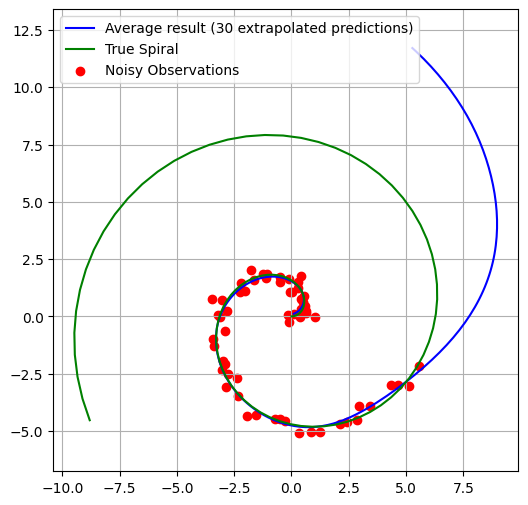

In [24]:
res2=[[np.float64(0.10239902), np.float64(0.11580057000000009)], [np.float64(0.138640932), np.float64(0.13060694833333333)], [np.float64(0.17486210399999996), np.float64(0.147977593)], [np.float64(0.2108328383333333), np.float64(0.16795594000000003)], [np.float64(0.24631227600000002), np.float64(0.1905710316666667)], [np.float64(0.2810495623333333), np.float64(0.21583695966666666)], [np.float64(0.31478498400000005), np.float64(0.2437525823333333)], [np.float64(0.3472519006666667), np.float64(0.274301547)], [np.float64(0.378177571), np.float64(0.307451959)], [np.float64(0.4072850893333333), np.float64(0.3431569696666667)], [np.float64(0.43429500133333326), np.float64(0.38135430666666664)], [np.float64(0.4589264776666667), np.float64(0.4219668523333332)], [np.float64(0.4808990763333334), np.float64(0.464902807)], [np.float64(0.4999344106666668), np.float64(0.5100553763333333)], [np.float64(0.5157575893333333), np.float64(0.5573033606666666)], [np.float64(0.528098928), np.float64(0.6065101253333333)], [np.float64(0.536695675), np.float64(0.6575242623333334)], [np.float64(0.541293571), np.float64(0.7101787209999999)], [np.float64(0.5416489843333334), np.float64(0.7642903959999999)], [np.float64(0.5375304356666667), np.float64(0.8196592580000001)], [np.float64(0.5287210303333333), np.float64(0.8760681379999998)], [np.float64(0.5150200783333334), np.float64(0.9332817543333334)], [np.float64(0.4962454333333332), np.float64(0.9910456213333334)], [np.float64(0.47223583266666674), np.float64(1.0490866253333333)], [np.float64(0.4428527433333333), np.float64(1.1071121633333334)], [np.float64(0.40798268), np.float64(1.1648100466666669)], [np.float64(0.3675389133333333), np.float64(1.2218503)], [np.float64(0.321463997), np.float64(1.2778840233333333)], [np.float64(0.2697310030000001), np.float64(1.3325458866666664)], [np.float64(0.21234488933333331), np.float64(1.385456823333333)], [np.float64(0.14934380100000005), np.float64(1.43622472)], [np.float64(0.08079961283333334), np.float64(1.48444756)], [np.float64(0.006818679869999999), np.float64(1.5297152866666666)], [np.float64(-0.07245825430000002), np.float64(1.5716154266666664)], [np.float64(-0.156856258), np.float64(1.609733003333333)], [np.float64(-0.24616661866666664), np.float64(1.6436538100000002)], [np.float64(-0.34014748166666664), np.float64(1.6729708266666665)], [np.float64(-0.4385250926666667), np.float64(1.6972836133333333)], [np.float64(-0.540994599), np.float64(1.7162037399999999)], [np.float64(-0.647221232), np.float64(1.7293587800000003)], [np.float64(-0.7568417226666667), np.float64(1.7363942933333327)], [np.float64(-0.8694666363333333), np.float64(1.7369807333333334)], [np.float64(-0.9846812260000001), np.float64(1.7308155099999998)], [np.float64(-1.1020477899999999), np.float64(1.7176303200000003)], [np.float64(-1.2211073966666666), np.float64(1.6971956)], [np.float64(-1.3413827), np.float64(1.6693263200000004)], [np.float64(-1.462379553333333), np.float64(1.6338845033333336)], [np.float64(-1.583589933333333), np.float64(1.5907888)], [np.float64(-1.704495006666667), np.float64(1.5400113799999997)], [np.float64(-1.824568826666667), np.float64(1.4815813833333336)], [np.float64(-1.9432794866666663), np.float64(1.4155838433333334)], [np.float64(-2.0600949466666667), np.float64(1.3421556666666665)], [np.float64(-2.1744830900000003), np.float64(1.2614787266666665)], [np.float64(-2.2859148966666667), np.float64(1.1737734866666665)], [np.float64(-2.393870506666667), np.float64(1.0792876633333333)], [np.float64(-2.4978350033333334), np.float64(0.9782892516666666)], [np.float64(-2.59730724), np.float64(0.8710560906666667)], [np.float64(-2.6917976766666665), np.float64(0.7578695390000002)], [np.float64(-2.7808356933333345), np.float64(0.63900921)], [np.float64(-2.8639706366666666), np.float64(0.5147514503333334)], [np.float64(-2.9407741666666665), np.float64(0.385368979)], [np.float64(-3.010849283333334), np.float64(0.25113406299999996)], [np.float64(-3.0738304933333334), np.float64(0.11232199376666667)], [np.float64(-3.1293888966666668), np.float64(-0.030785030453333327)], [np.float64(-3.1772355800000005), np.float64(-0.17789523266666665)], [np.float64(-3.2171209466666664), np.float64(-0.32870600800000005)], [np.float64(-3.2488322166666674), np.float64(-0.4829054446666667)], [np.float64(-3.272191853333333), np.float64(-0.640176309)], [np.float64(-3.287050783333333), np.float64(-0.800200503)], [np.float64(-3.293282046666666), np.float64(-0.9626632963333335)], [np.float64(-3.29077262), np.float64(-1.1272560533333331)], [np.float64(-3.2794160800000003), np.float64(-1.2936752833333334)], [np.float64(-3.2591040233333333), np.float64(-1.4616211766666674)], [np.float64(-3.229714873333333), np.float64(-1.6307942333333334)], [np.float64(-3.1911069233333333), np.float64(-1.8008912500000003)], [np.float64(-3.1431162000000006), np.float64(-1.9716033166666667)], [np.float64(-3.0855587300000007), np.float64(-2.1426123499999994)], [np.float64(-3.0182393933333334), np.float64(-2.313590386666667)], [np.float64(-2.9409608866666663), np.float64(-2.4841866066666665)], [np.float64(-2.8535311033333333), np.float64(-2.654017706666667)], [np.float64(-2.755780996666666), np.float64(-2.8226516133333335)], [np.float64(-2.647575920000001), np.float64(-2.9895929533333336)], [np.float64(-2.5288286999999996), np.float64(-3.1542792133333335)], [np.float64(-2.39951664), np.float64(-3.3160693433333335)], [np.float64(-2.259688533333333), np.float64(-3.4742584599999997)], [np.float64(-2.109472906666667), np.float64(-3.6280778166666665)], [np.float64(-1.9490749966666672), np.float64(-3.7767172566666662)], [np.float64(-1.7787761566666664), np.float64(-3.91932691)], [np.float64(-1.5989269666666666), np.float64(-4.05502821)], [np.float64(-1.4099332400000002), np.float64(-4.182924933333334)], [np.float64(-1.2122704999999998), np.float64(-4.302096233333332)], [np.float64(-1.0064664896666666), np.float64(-4.411615173333332)], [np.float64(-0.793120571), np.float64(-4.510536636666667)], [np.float64(-0.5728866516666666), np.float64(-4.597921070000001)], [np.float64(-0.34648729886666657), np.float64(-4.672838783333333)], [np.float64(-0.11468855146666666), np.float64(-4.73438346)], [np.float64(0.12169103938999999), np.float64(-4.781699939999999)], [np.float64(0.3618139520000001), np.float64(-4.8140152)], [np.float64(0.604819544), np.float64(-4.830679229999999)], [np.float64(0.8498612823333332), np.float64(-4.831221603333334)], [np.float64(1.0961075236666666), np.float64(-4.815389896666665)], [np.float64(1.3427793633333331), np.float64(-4.7832159433333326)], [np.float64(1.5891553733333332), np.float64(-4.735047653333333)], [np.float64(1.8346077266666667), np.float64(-4.671555016666667)], [np.float64(2.078595026666666), np.float64(-4.593711576666666)], [np.float64(2.3206909866666665), np.float64(-4.502739703333333)], [np.float64(2.5605584699999997), np.float64(-4.400024273333334)], [np.float64(2.7979578533333322), np.float64(-4.287015139999999)], [np.float64(3.0327056499999996), np.float64(-4.165150479999999)], [np.float64(3.2646737599999995), np.float64(-4.035780823333335)], [np.float64(3.4937436466666663), np.float64(-3.900141576666667)], [np.float64(3.71980251), np.float64(-3.7593213999999993)], [np.float64(3.9427045966666663), np.float64(-3.61427479)], [np.float64(4.1622802766666664), np.float64(-3.4658115533333334)], [np.float64(4.378315886666666), np.float64(-3.314621883333332)], [np.float64(4.59056667), np.float64(-3.1612776533333338)], [np.float64(4.798778080000002), np.float64(-3.00623985)], [np.float64(5.002686713333333), np.float64(-2.84988634)], [np.float64(5.202056083333335), np.float64(-2.6925087300000006)], [np.float64(5.396665503333334), np.float64(-2.53433323)], [np.float64(5.586338013333334), np.float64(-2.37552301)], [np.float64(5.770930416666667), np.float64(-2.216187496666667)], [np.float64(5.950330763333332), np.float64(-2.056394886666667)], [np.float64(6.124459776666667), np.float64(-1.896179283333333)], [np.float64(6.293266423333334), np.float64(-1.7355445066666668)], [np.float64(6.45671772), np.float64(-1.5744739999999997)], [np.float64(6.6147927399999995), np.float64(-1.4129456799999998)], [np.float64(6.767489143333333), np.float64(-1.2509162303333332)], [np.float64(6.914816156666666), np.float64(-1.0883381209999998)], [np.float64(7.056791823333332), np.float64(-0.9251579666666667)], [np.float64(7.193442653333332), np.float64(-0.7613163193333334)], [np.float64(7.324802436666668), np.float64(-0.5967485333333334)], [np.float64(7.4509128133333355), np.float64(-0.4313910426666666)], [np.float64(7.571814973333333), np.float64(-0.26518888825)], [np.float64(7.687557710000001), np.float64(-0.09809421443333337)], [np.float64(7.798183156666665), np.float64(0.06993819023333331)], [np.float64(7.903741876666667), np.float64(0.23894680256666664)], [np.float64(8.004269486666667), np.float64(0.4089640866)], [np.float64(8.099798316666666), np.float64(0.5800216415666667)], [np.float64(8.190353609999999), np.float64(0.7521563416666666)], [np.float64(8.275947486666668), np.float64(0.9254086946666666)], [np.float64(8.356578879999999), np.float64(1.0998156180000003)], [np.float64(8.432236683333333), np.float64(1.2754134186666666)], [np.float64(8.502905550000001), np.float64(1.4522314300000003)], [np.float64(8.568567516666667), np.float64(1.630284302333333)], [np.float64(8.629205783333333), np.float64(1.80956298)], [np.float64(8.684814756666666), np.float64(1.9900309600000001)], [np.float64(8.735398283333332), np.float64(2.1716366099999997)], [np.float64(8.780965526666666), np.float64(2.3543071166666674)], [np.float64(8.821539769999996), np.float64(2.5379574900000006)], [np.float64(8.857152953333333), np.float64(2.72250392)], [np.float64(8.887835866666668), np.float64(2.90786127)], [np.float64(8.913621710000001), np.float64(3.0939434766666665)], [np.float64(8.93455267), np.float64(3.280667523333334)], [np.float64(8.950677153333336), np.float64(3.467953083333333)], [np.float64(8.9620453), np.float64(3.6557273933333336)], [np.float64(8.968706370000001), np.float64(3.843921953333334)], [np.float64(8.970723316666666), np.float64(4.0324763400000005)], [np.float64(8.968164083333335), np.float64(4.221343)], [np.float64(8.961093103333331), np.float64(4.410485886666666)], [np.float64(8.949585083333334), np.float64(4.599865003333334)], [np.float64(8.933715009999998), np.float64(4.7894381)], [np.float64(8.913565033333331), np.float64(4.979164843333334)], [np.float64(8.889213063333333), np.float64(5.16900249)], [np.float64(8.860732639999998), np.float64(5.358898883333334)], [np.float64(8.828194076666668), np.float64(5.54881737)], [np.float64(8.791664313333335), np.float64(5.738722723333334)], [np.float64(8.751189919999998), np.float64(5.928587146666667)], [np.float64(8.706803853333334), np.float64(6.118385466666667)], [np.float64(8.65852886), np.float64(6.308104863333333)], [np.float64(8.606365973333332), np.float64(6.497730399999999)], [np.float64(8.550294059999999), np.float64(6.687257496666667)], [np.float64(8.490282369999996), np.float64(6.876670070000002)], [np.float64(8.426284986666667), np.float64(7.065951779999998)], [np.float64(8.358233836666667), np.float64(7.255083756666667)], [np.float64(8.286053409999997), np.float64(7.444027816666667)], [np.float64(8.209659836666665), np.float64(7.6327467833333325)], [np.float64(8.128967193333333), np.float64(7.821190749999999)], [np.float64(8.043898456666666), np.float64(8.00930144)], [np.float64(7.95438742), np.float64(8.19701731)], [np.float64(7.860396053333334), np.float64(8.384259260000002)], [np.float64(7.761896963333333), np.float64(8.5709477)], [np.float64(7.658892279999999), np.float64(8.756990933333334)], [np.float64(7.551409933333334), np.float64(8.94228186)], [np.float64(7.439489853333332), np.float64(9.126708623333334)], [np.float64(7.323191123333333), np.float64(9.310163900000001)], [np.float64(7.202578746666665), np.float64(9.492528230000001)], [np.float64(7.077730523333334), np.float64(9.67367905)], [np.float64(6.948715926666666), np.float64(9.853501766666666)], [np.float64(6.815604483333333), np.float64(10.031875799999996)], [np.float64(6.678464436666665), np.float64(10.208685300000003)], [np.float64(6.53736873), np.float64(10.383803466666668)], [np.float64(6.39238002), np.float64(10.557111133333331)], [np.float64(6.243565803333334), np.float64(10.728476516666667)], [np.float64(6.0909940533333335), np.float64(10.897772150000002)], [np.float64(5.93474155), np.float64(11.064853933333335)], [np.float64(5.77487588), np.float64(11.229582616666672)], [np.float64(5.611472196666668), np.float64(11.391819183333334)], [np.float64(5.444594539999998), np.float64(11.551429183333331)], [np.float64(5.274316043333333), np.float64(11.708273033333336)]]
res2 = np.array(res2)  # ← リストをNumPy配列に変換。これをすることで下のプロットのスライスを用いた書き方ができる。逆にこれがないと「リストのまま NumPy 的なインデックス指定」することになりエラーになる
plt.figure(figsize=(6, 6))
plt.plot(res2[:, 0], res2[:, 1], label="Average result (30 extrapolated predictions)", color='blue')# 各回の平均を取ったスパイラル予測
plt.plot(true_x,true_y,label='True Spiral',color='green')
plt.scatter(noisy_x,noisy_y,label='Noisy Observations',color='red') #「plt.scatter(x, y, label="○○")」で散布図を描く関数
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
